# Ejemplo de FIS tipo Mamdani

In [1]:
import numpy as np
import FuzzySystem as fs

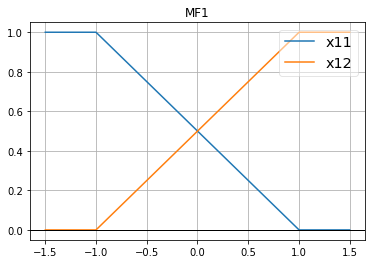

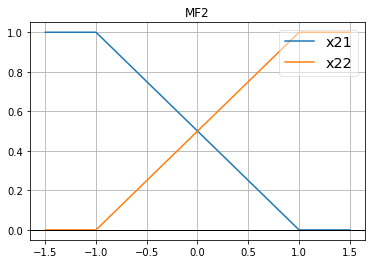

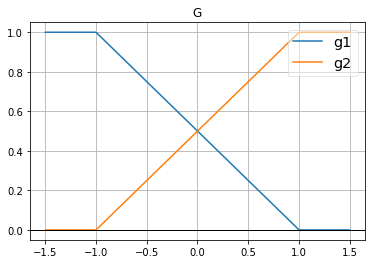

In [2]:
#INPUTS
x11 = fs.FuzzySet('x11', fs.Trapmf([-1.5,-1.5,-1,1]))
x12 = fs.FuzzySet('x12', fs.Trapmf([-1,1,1.5,1.5]))
mf1 = fs.FuzzyVariable('MF1',[x11, x12], universe=[-1.5, 1.5])
mf1.show()

x21 = fs.FuzzySet('x21', fs.Trapmf([-1.5,-1.5,-1,1]))
x22 = fs.FuzzySet('x22', fs.Trapmf([-1,1,1.5,1.5]))
mf2 = fs.FuzzyVariable('MF2',[x21, x22], universe=[-1.5, 1.5])
mf2.show()

#OUTPUT

g1 = fs.FuzzySet('g1', fs.Trapmf([-1.5,-1.5,-1,1]))
g2 = fs.FuzzySet('g2', fs.Trapmf([-1,1,1.5,1.5]))
G = fs.FuzzyVariable('G',[g1, g2], universe=[-1.5, 1.5])
G.show()


#RULES

ant1  = fs.Antecedent(mf1['x11'] & mf2['x21'])
rule1 = fs.FuzzyRule(ant1, fs.Consequent(G['g1']))

ant2  = fs.Antecedent(mf1['x11'] & mf2['x22'])
rule2 = fs.FuzzyRule(ant2, fs.Consequent(G['g2']))

ant3  = fs.Antecedent(mf1['x12'] & mf2['x21'])
rule3 = fs.FuzzyRule(ant3, fs.Consequent(G['g1']))

ant4  = fs.Antecedent(mf1['x12'] & mf2['x22'])
rule4 = fs.FuzzyRule(ant4, fs.Consequent(G['g2']))

#Building the FIS

fis = fs.FuzzyInferenceSystem([rule1, rule2, rule3, rule4], and_op='min', or_op='sum')

#FIS Evaluation

inputs = (('MF1',np.float(-0.3)), ('MF2',np.float(0.6)))
result = fis.eval(inputs)

<class 'dict'>
Centroid=0.363
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
Center of Sets=0.255
<class 'dict'>
Heights=0.441


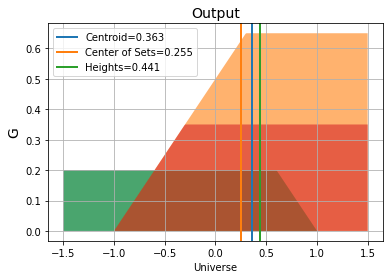

In [3]:
result.show([fs.Centroid, fs.CenterOfSets, fs.Heights])